In [2]:
import sys
sys.path.insert(0, '/home/wcmelby/Library/Python/wcmelby-HWP_Characterizations/')
from New_DRRP_Functions import *

First need to reduce the images and save to a new folder

No sample data

In [21]:
# dark_file = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/Darks/Dark_490_2.fits"
# fits.open(dark_file)
# dark = fits.getdata(dark_file)
# dark_median = np.median(dark, axis=0)

# old_directory = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/L_Transmission/No_Sample_Intensity/Raw_Data/"
# new_directory = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/L_Transmission/No_Sample_Intensity/Reduced_Data/"
# image_file = "L_Transmission"
# for filename in os.listdir(old_directory):
#     if filename.startswith(image_file):                                # Call specific files starting with the desired name
#         with fits.open(os.path.join(old_directory, filename)) as hdul:
#             img_data = hdul[0].data
#             img_median = np.median(img_data, axis=0)
#             reduced_data = img_median - dark_median

#             # Save the newly reduced image to a reduced data folder
#         new_filename = f"Reduced_{filename}"
#         new_filepath = os.path.join(new_directory, new_filename)
#         fits.writeto(new_filepath, reduced_data, overwrite=True)

In [22]:
no_sample_flux = np.array([])
reduced_folder = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/L_Transmission/No_Sample_Intensity/Reduced_Data/"
reduced_filename = "Reduced_L_Transmission"
lcenter = [316, 250]
rcenter = [316, 327]
maxradius = 20

for filename in sorted(os.listdir(reduced_folder), key = extract_number):
    if filename.startswith(reduced_filename):
        with fits.open(os.path.join(reduced_folder, filename)) as hdul:
            reduced_img_data = hdul[0].data
            ys, xs, = np.indices(reduced_img_data.shape)
            lradius = np.sqrt((ys-lcenter[0])**2+(xs-lcenter[1])**2)
            rradius = np.sqrt((ys-rcenter[0])**2+(xs-rcenter[1])**2)

            lbackground_mask = (lradius > 30) & (lradius < 35)
            rbackground_mask = (rradius > 30) & (rradius < 35)   # Index the background around each spot, take the median value

            background_lmedian = np.median(reduced_img_data[lbackground_mask])
            background_rmedian = np.median(reduced_img_data[rbackground_mask])

            lflux = np.sum(reduced_img_data[lradius < maxradius] - background_lmedian)   # Now take the flux with the background mask subtracted
            rflux = np.sum(reduced_img_data[rradius < maxradius] - background_rmedian)
            no_sample_flux = np.append(no_sample_flux, lflux+rflux)
print(no_sample_flux)

[ 96769.5  97033.5 145154.  201629.  212825.5 178925.5 507103.   74145.
 154377. ]


Sample Data

In [14]:
# dark_file = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/Darks/Dark_490_2.fits"
# fits.open(dark_file)
# dark = fits.getdata(dark_file)
# dark_median = np.median(dark, axis=0)

# old_directory = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/L_Transmission/Sample_Intensity/Raw_Data/"
# new_directory = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/L_Transmission/Sample_Intensity/Reduced_Data/"
# image_file = "L_Transmission"
# for filename in os.listdir(old_directory):
#     if filename.startswith(image_file):                                # Call specific files starting with the desired name
#         with fits.open(os.path.join(old_directory, filename)) as hdul:
#             img_data = hdul[0].data
#             img_median = np.median(img_data, axis=0)
#             reduced_data = img_median - dark_median

#             # Save the newly reduced image to a reduced data folder
#         new_filename = f"Reduced_{filename}"
#         new_filepath = os.path.join(new_directory, new_filename)
#         fits.writeto(new_filepath, reduced_data, overwrite=True)

In [15]:
sample_flux = np.array([])
reduced_folder = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/L_Plate_Characterization/SuperK_Select_Data/L_Transmission/Sample_Intensity/Reduced_Data/"
reduced_filename = "Reduced_L_Transmission"
lcenter = [316, 250]
rcenter = [316, 327]
maxradius = 20

for filename in sorted(os.listdir(reduced_folder), key = extract_number):
    if filename.startswith(reduced_filename):
        with fits.open(os.path.join(reduced_folder, filename)) as hdul:
            reduced_img_data = hdul[0].data
            ys, xs, = np.indices(reduced_img_data.shape)
            lradius = np.sqrt((ys-lcenter[0])**2+(xs-lcenter[1])**2)
            rradius = np.sqrt((ys-rcenter[0])**2+(xs-rcenter[1])**2)

            lbackground_mask = (lradius > 30) & (lradius < 35)
            rbackground_mask = (rradius > 30) & (rradius < 35)   # Index the background around each spot, take the median value

            background_lmedian = np.median(reduced_img_data[lbackground_mask])
            background_rmedian = np.median(reduced_img_data[rbackground_mask])

            lflux = np.sum(reduced_img_data[lradius < maxradius] - background_lmedian)   # Now take the flux with the background mask subtracted
            rflux = np.sum(reduced_img_data[rradius < maxradius] - background_rmedian)
            sample_flux = np.append(sample_flux, lflux+rflux)
print(sample_flux)

[ 75434.5  82795.  123863.5 167508.  165574.5 156466.5 427042.   57268.
 131499. ]


In [4]:
# sample_flux = np.delete(sample_flux, [0, 1, 2])
# print(sample_flux)

[569298.5 574351.  586666.  472095.5 291477.  293296.5]


In [23]:
percent_transmission = sample_flux/no_sample_flux*100
print(percent_transmission)

[77.95276404 85.32620178 85.33247448 83.07733511 77.79824316 87.44784841
 84.21208315 77.23784476 85.18043491]


In [10]:
wavelengths = [1100, 1200, 1300, 1400, 1500, 1600, 1750, 1850, 1950]

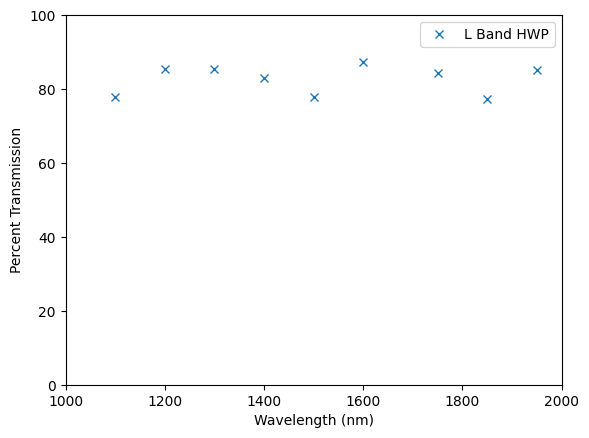

In [24]:
plt.xlim(1000, 2000)
plt.ylim(0, 100)
plt.ylabel("Percent Transmission")
plt.xlabel("Wavelength (nm)")

plt.plot(wavelengths, percent_transmission, marker='x', linestyle=' ', label='L Band HWP')
plt.legend()